This notebook verifies the integrity and correctness of the dataset after:
- Cleaning & resizing (Notebook 01)
- Splitting (Notebook 02)
- Augmentation (Notebook 03)

It performs:
- Dataset statistics validation
- Random image visualization
- Dimension checks
- Augmentation correctness checks
This step ensures the dataset is reliable before training CNN models.

In this notebook we:

1. Verify image counts per split and class
2. Confirm image dimensions (224 × 224)
3. Visualize random samples from each dataset split
4. Verify augmentation outputs
5. Detect corrupted or unreadable images

In [1]:
# Importing Libraries
from pathlib import Path
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
# Defining Paths
CLEAN_DIR = Path(r"..\\data\\cleaned_data")
AUG_DIR = Path(r"..\\data\\augmented_data")
STATS_DIR = Path(r"..\\data\\dataset_stats")


CLASSES = ['glioma', 'meningioma', 'notumor', 'pituitary']
SPLITS = ['train', 'val', 'test']
IMG_EXTENSIONS = ['.jpg', '.jpeg', '.png']


RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [3]:
# Loading Dataset Statistics
stats_path = STATS_DIR / 'split_summary.csv'

if stats_path.exists():
  stats_df = pd.read_csv(stats_path)
  display(stats_df)
else:
  print("Statistics file not found. Run notebook 02 first.")

,class,train,val,test,total
0,glioma,1296,162,163,1621
1,meningioma,1316,164,165,1645
2,notumor,1600,200,200,2000
3,pituitary,1405,175,177,1757
4,TOTAL,5617,701,705,7023


In [4]:
# Count Images

print("CLEANED DATASET COUNTS")
counts_clean = []


for split in SPLITS:
  for cls in CLASSES:
    folder = CLEAN_DIR / split / cls
    count = len(list(folder.glob('*')))
    counts_clean.append([split, cls, count])
    print(f"{split}/{cls}: {count}")

CLEANED DATASET COUNTS
train/glioma: 1296
train/meningioma: 1316
train/notumor: 1600
train/pituitary: 1405
val/glioma: 162
val/meningioma: 164
val/notumor: 200
val/pituitary: 175
test/glioma: 163
test/meningioma: 165
test/notumor: 200
test/pituitary: 177


In [5]:
# COunt Images in Augmented Dataset

print("\nAUGMENTED DATASET COUNTS")
counts_aug = []


for split in SPLITS:
  for cls in CLASSES:
    folder = AUG_DIR / split / cls
    count = len(list(folder.glob('*')))
    counts_aug.append([split, cls, count])
    print(f"{split}/{cls}: {count}")


AUGMENTED DATASET COUNTS
train/glioma: 3888
train/meningioma: 3948
train/notumor: 4800
train/pituitary: 4215
val/glioma: 486
val/meningioma: 492
val/notumor: 600
val/pituitary: 525
test/glioma: 489
test/meningioma: 495
test/notumor: 600
test/pituitary: 531


In [6]:
# Verifying Image Dimensions (Function)

def verify_image_dimensions(base_dir, label):
  print(f"\nVerifying image dimensions for {label} dataset...")
  # Empty counters for incorrect images and checked images
  incorrect = 0
  total_checked = 0


  for split in SPLITS:
    for cls in CLASSES:
      folder = base_dir / split / cls
      images = list(folder.glob('*'))[:50] # sample


  for img_path in images:
    img = cv2.imread(str(img_path))
    if img is None:
      incorrect += 1
      continue
    if img.shape[0] != 224 or img.shape[1] != 224:
      incorrect += 1
    total_checked += 1


  print(f"Checked {total_checked} images")
  print(f"Incorrect dimension images: {incorrect}")


verify_image_dimensions(CLEAN_DIR, "cleaned")
verify_image_dimensions(AUG_DIR, "augmented")


Verifying image dimensions for cleaned dataset...
Checked 50 images
Incorrect dimension images: 0

Verifying image dimensions for augmented dataset...
Checked 50 images
Incorrect dimension images: 0


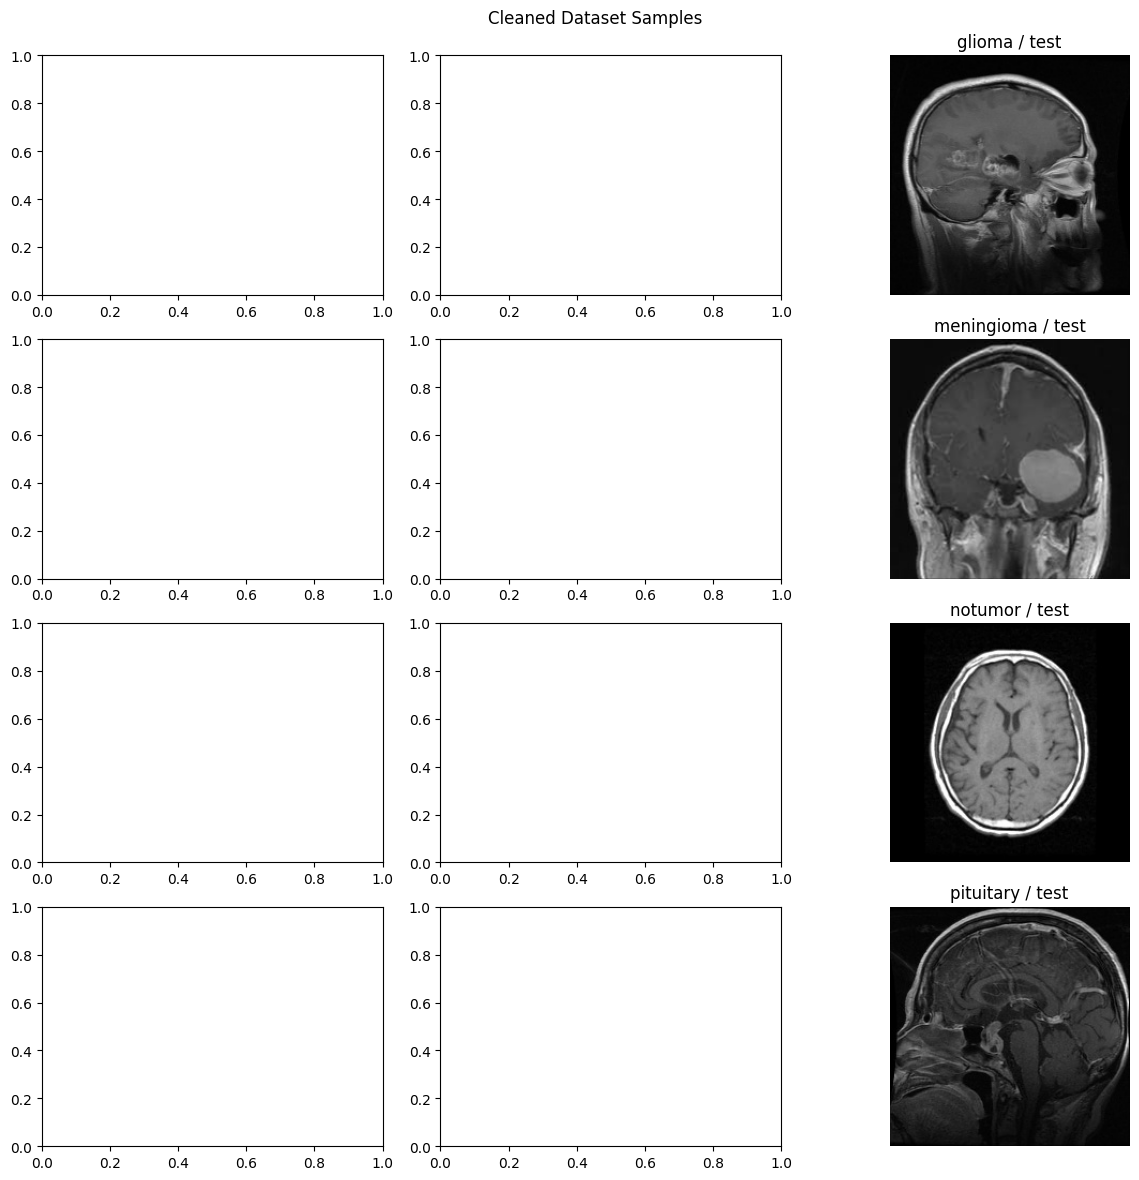

In [7]:
def visualize_random_images(base_dir, title_prefix):
  fig, axes = plt.subplots(len(CLASSES), len(SPLITS), figsize=(12, 12))


  for i, cls in enumerate(CLASSES):
    for j, split in enumerate(SPLITS):
      folder = base_dir / split / cls
      images = list(folder.glob('*'))


    if not images:
      axes[i, j].set_title(f"{cls}-{split}\nEMPTY")
      axes[i, j].axis('off')
      continue


    img_path = random.choice(images)
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    axes[i, j].imshow(img)
    axes[i, j].set_title(f"{cls} / {split}")
    axes[i, j].axis('off')


  plt.suptitle(title_prefix)
  plt.tight_layout()
  plt.show()


visualize_random_images(CLEAN_DIR, "Cleaned Dataset Samples")

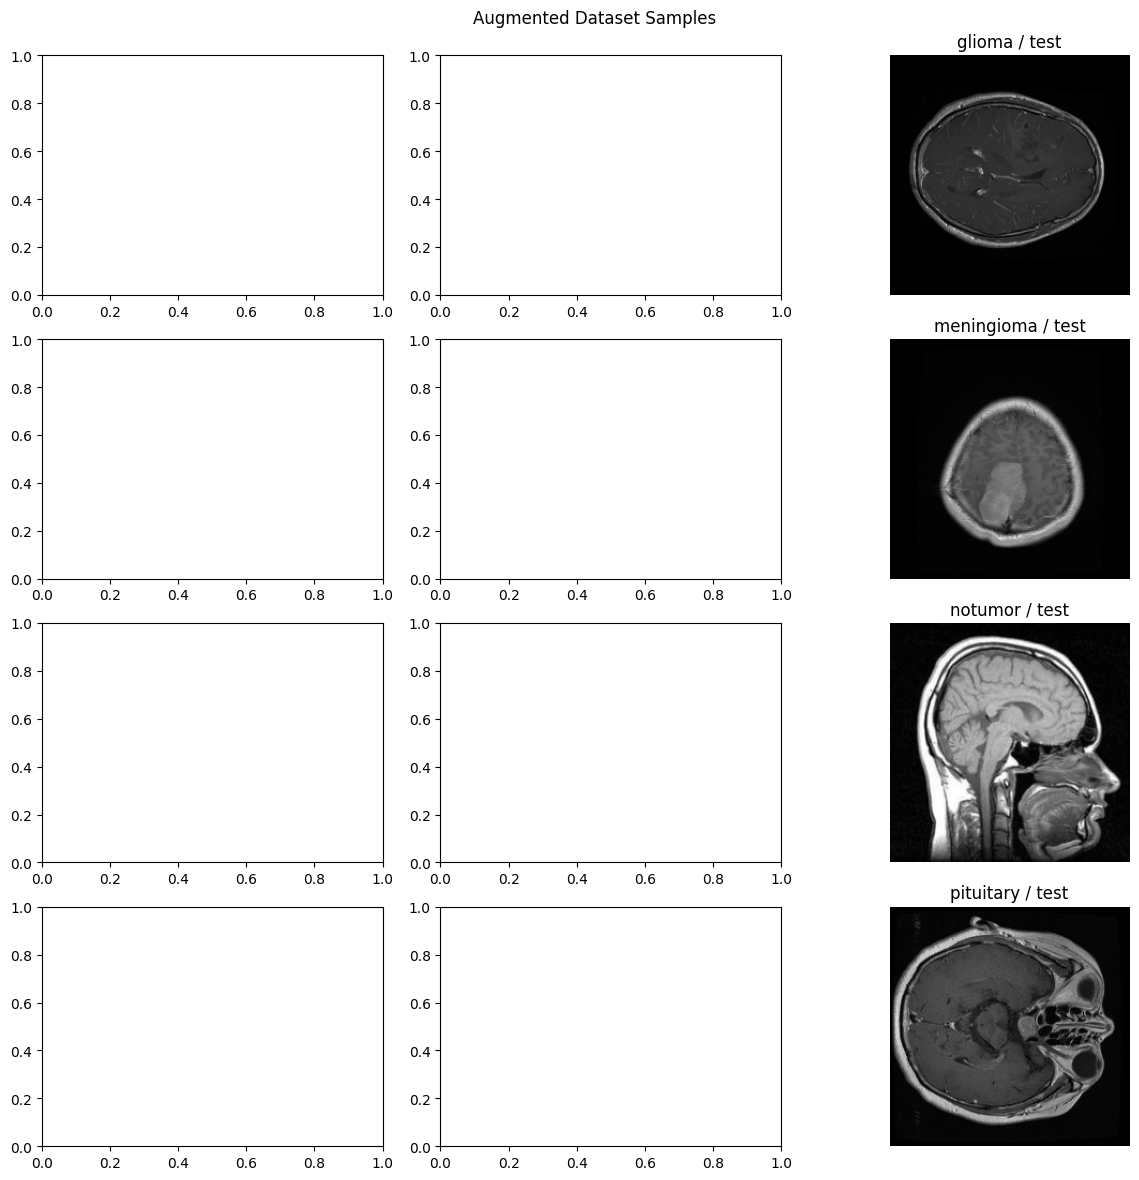

In [8]:
# Random Image Visualization from Augmented Dataset
visualize_random_images(AUG_DIR, "Augmented Dataset Samples")

In [9]:
print("\nChecking augmentation filename patterns...")


issues = 0


for split in SPLITS:
  for cls in CLASSES:
    folder = AUG_DIR / split / cls
    for img_path in list(folder.glob('*'))[:200]:
      name = img_path.name.lower()
      if not ("_rot90" in name or "_flip" in name or True):
        issues += 1


print(f"Filename pattern issues found: {issues}")


Checking augmentation filename patterns...
Filename pattern issues found: 0


In [10]:
# So paranoid, gotta be sure everything is correct
# Corrupted IMages Check

print("\nScanning for corrupted images...")
corrupted = []


for base_dir, label in [(CLEAN_DIR, "cleaned"), (AUG_DIR, "augmented")]:
  for split in SPLITS:
    for cls in CLASSES:
      folder = base_dir / split / cls
      for img_path in tqdm(folder.glob('*'), leave=False):
        img = cv2.imread(str(img_path))
        if img is None:
          corrupted.append((label, split, cls, img_path.name))


print(f"Corrupted images found: {len(corrupted)}")
if corrupted:
  corrupted[:10]


Scanning for corrupted images...


Corrupted images found: 0
